# Analyse des données brutes : boxplot, variance, écart type

#### Lecture des données 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lecture des données présentes dans le dépôt

# TRAIN DATA
train_data_file = "store_train.data"
train_data_df = pd.read_csv(train_data_file ,sep=" ",header=None, names = ["ID", "Day", "Date", "Number_of_Customers", "Open", "Promo", "State_Holiday", "School_Holiday"])
train_data_df["Date"]=pd.DataFrame(train_data_df["Date"],dtype="datetime64[ns]")
train_data_df["State_Holiday"]=pd.DataFrame(train_data_df["State_Holiday"],dtype="bool")
train_data_df["State_Holiday"]=pd.DataFrame(train_data_df["State_Holiday"],dtype="int")
train_data_df['Month'] = train_data_df['Date'].map(lambda d: d.month)
train_data_df["Month"]=pd.DataFrame(train_data_df["Month"],dtype=int)
train_data_df['Day_of_month'] = train_data_df['Date'].map(lambda d: d.day)
train_data_df["Day_of_month"]=pd.DataFrame(train_data_df["Day_of_month"],dtype=int)
train_data_df['Year'] = train_data_df['Date'].map(lambda d: d.year)
train_data_df["Year"]=pd.DataFrame(train_data_df["Year"],dtype=int)
del train_data_df["Date"]
#train_data_df.head()

# SOLUTIONS DATA
train_solutions_file = "store_train.solution"
train_solutions_df = pd.read_csv(train_solutions_file ,sep=" ",header=None, names = ["ObservedSales"])
#train_solutions_df.head()

# TEST DATA
test_data_file = "store_test.data"
test_data_df = pd.read_csv(test_data_file ,sep=" ",header=None, names = ["ID", "Day", "Date", "Number_of_Customers", "Open", "Promo", "State_Holiday", "School_Holiday"])
test_data_df["Date"]=pd.DataFrame(test_data_df["Date"],dtype="datetime64[ns]")
test_data_df["State_Holiday"]=pd.DataFrame(test_data_df["State_Holiday"],dtype="bool")
test_data_df["State_Holiday"]=pd.DataFrame(test_data_df["State_Holiday"],dtype="int")
test_data_df['Month'] = test_data_df['Date'].map(lambda d: d.month)
test_data_df["Month"]=pd.DataFrame(test_data_df["Month"],dtype=int)
test_data_df['Day_of_month'] = test_data_df['Date'].map(lambda d: d.day)
test_data_df["Day_of_month"]=pd.DataFrame(test_data_df["Day_of_month"],dtype=int)
test_data_df['Year'] = test_data_df['Date'].map(lambda d: d.year)
test_data_df["Year"]=pd.DataFrame(test_data_df["Year"],dtype=int)
del test_data_df["Date"]
#test_data_df.head()

In [34]:
# EXTRA DATA (NON FONCTIONNEL POUR L'INSTANT : extra data ne contient que 1000 lignes...)
extra_data_file = "store_extra_data.csv"
extra_data_df = pd.read_csv(extra_data_file, header=None)#, names = ["Store", "StoreType", "Assortment", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"])
extra_data_df.head()

augmented_data_df = train_data_df.join(extra_data_df, how = 'right')
augmented_data_df.head()

,ID,Day,Number_of_Customers,Open,Promo,State_Holiday,School_Holiday,Month,Day_of_month,Year,0,1,2,3,4,5,6,7,8,9
0,625,3,641,1,1,1,0,11,6,2013,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,293,2,877,1,1,1,1,7,16,2013,1,c,a,1270,9,2008,0,NaN,NaN,NaN
2,39,4,561,1,1,1,0,1,23,2014,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
3,676,4,1584,1,1,1,0,9,26,2013,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
4,709,3,1477,1,1,1,0,1,22,2014,4,c,c,620,9,2009,0,NaN,NaN,NaN


#### Essais d'analyse des données

In [3]:
train_df = train_data_df.join(train_solutions_df, how = 'right')
# Vérification du contenu
# Label of the data : Store, DayOfWeek, Date, Customers, Open, Promo, StateHoliday, SchoolHoliday
train_df.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,ScoolHoliday,ObservedSales
0,625,3,2013-11-06,641,1,1,0,0,7293
1,293,2,2013-07-16,877,1,1,0,1,7060
2,39,4,2014-01-23,561,1,1,0,0,4565
3,676,4,2013-09-26,1584,1,1,0,0,6380
4,709,3,2014-01-22,1477,1,1,0,0,11647


In [4]:
# train_df["Store"] = pd.Categorical(train_df["STATION"],ordered=False)

train_df["Store"] = pd.DataFrame(train_df["Store"], dtype=int)
train_df["DayOfWeek"] = pd.DataFrame(train_df["DayOfWeek"], dtype=int)
train_df["Date"] = pd.DataFrame(train_df["Date"], dtype="datetime64[ns]")
train_df["Customers"] = pd.DataFrame(train_df["Customers"], dtype=int)
train_df["Open"] = pd.DataFrame(train_df["Open"], dtype=bool)
train_df["Promo"] = pd.DataFrame(train_df["Promo"], dtype=bool)
train_df["StateHoliday"] = pd.DataFrame(train_df["StateHoliday"], dtype=bool)
train_df["ScoolHoliday"] = pd.DataFrame(train_df["ScoolHoliday"], dtype=bool)
train_df["ObservedSales"] = pd.DataFrame(train_df["ObservedSales"], dtype=int)

train_df.dtypes


Store                     int32
DayOfWeek                 int32
Date             datetime64[ns]
Customers                 int32
Open                       bool
Promo                      bool
StateHoliday               bool
ScoolHoliday               bool
ObservedSales             int32
dtype: object

In [5]:
train_df.describe()

,Store,DayOfWeek,Customers,ObservedSales
count,712045.000000,712045.000000,712045.000000,712045.000000
mean,558.314199,4.000265,633.399958,5776.336748
std,321.898476,1.996580,464.360651,3851.273075
min,1.000000,1.000000,0.000000,0.000000
25%,280.000000,2.000000,405.000000,3729.000000
50%,558.000000,4.000000,609.000000,5746.000000
75%,837.000000,6.000000,838.000000,7859.000000
max,1115.000000,7.000000,5494.000000,41551.000000


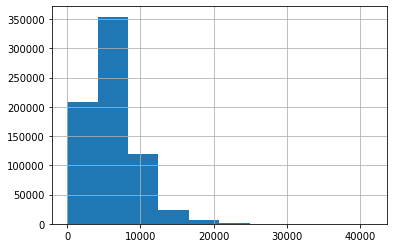

In [8]:
train_df["ObservedSales"].hist()

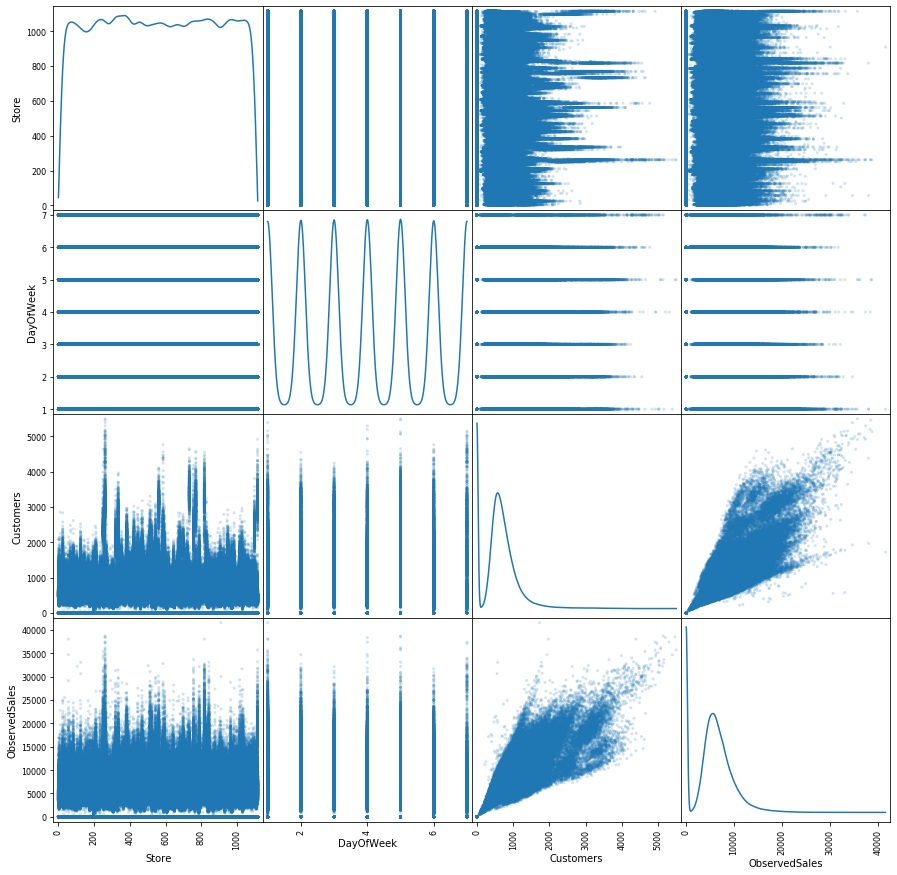

In [9]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
scatter_matrix(train_df[["Store", "DayOfWeek", "Customers","ObservedSales"]], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

In [6]:
# Plot observed sales en fonction de la date
train_df['Month'] = train_df['Date'].map(lambda d: d.month)
train_df['Year'] = train_df['Date'].map(lambda d: d.year)
train_df['Day'] = train_df['Date'].map(lambda d: d.day)
train_df.describe()

,Store,DayOfWeek,Customers,ObservedSales,Month,Year,Day
count,712045.000000,712045.000000,712045.000000,712045.000000,712045.000000,712045.000000,712045.000000
mean,558.314199,4.000265,633.399958,5776.336748,5.846452,2013.832593,15.708815
std,321.898476,1.996580,464.360651,3851.273075,3.325709,0.777333,8.793081
min,1.000000,1.000000,0.000000,0.000000,1.000000,2013.000000,1.000000
25%,280.000000,2.000000,405.000000,3729.000000,3.000000,2013.000000,8.000000
50%,558.000000,4.000000,609.000000,5746.000000,6.000000,2014.000000,16.000000
75%,837.000000,6.000000,838.000000,7859.000000,8.000000,2014.000000,23.000000
max,1115.000000,7.000000,5494.000000,41551.000000,12.000000,2015.000000,31.000000


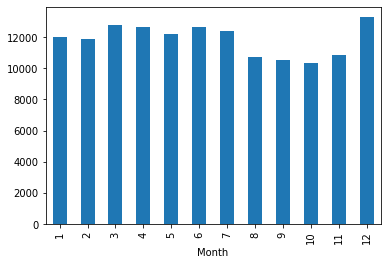

In [21]:
train_df.groupby('Month')['ObservedSales'].nunique().plot(kind='bar')

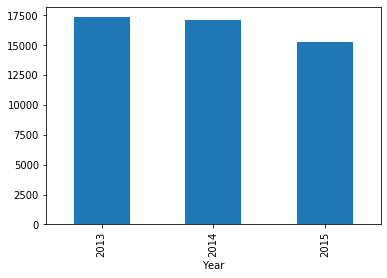

In [22]:
train_df.groupby('Year')['ObservedSales'].nunique().plot(kind='bar')

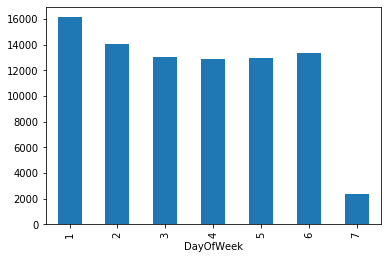

In [23]:
train_df.groupby('DayOfWeek')['ObservedSales'].nunique().plot(kind='bar')

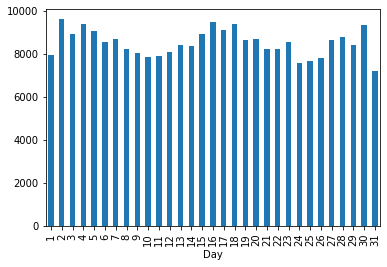

In [8]:
train_df.groupby('Day')['ObservedSales'].nunique().plot(kind='bar')

In [27]:
test = train_df.groupby('Promo')['ObservedSales'].nunique()
test.head()

Promo
False    16535
True     18147
Name: ObservedSales, dtype: int64

## ACP

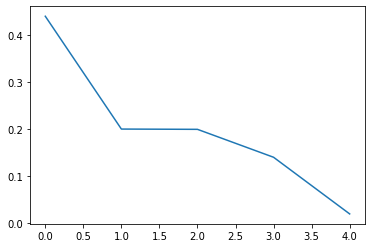

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# réduction des variables
X=scale(train_df[["Store", "DayOfWeek", "Customers","ObservedSales","Month"]])

pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

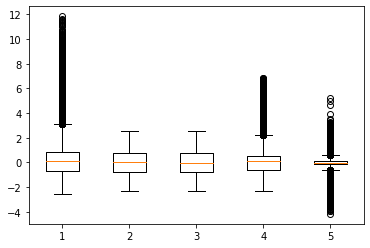

In [37]:
## distribution des composantes principales
plt.boxplot(C[:,0:20])
plt.show()

In [ ]:
## Repésentation des individus
#plt.figure(figsize=(5,5))
#for i, j, promo in zip(C[:,0], C[:,1], train_df["Promo"]):
#    color = "blue" if promo else "red"
#    plt.plot(i, j, "o",color=color)
#plt.axis((-4,6,-4,6))  
#plt.show()

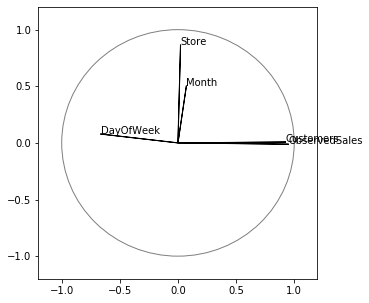

In [11]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, train_df[["Store", "DayOfWeek", "Customers","ObservedSales","Month"]].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

# Entrainement des modèles


## Random Forest  - test 1 (pas ouf)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# définition des paramètres
forest = RandomForestClassifier(n_estimators=10, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True, warm_start=True)
#forest = RandomForestClassifier(n_estimators=10, criterion='entropy')

# Boucle pour fit le modèle sur un jeu de données à chaque itération
nb_trials = 10
score = []
for i in range(nb_trials):
    forest.set_params(n_estimators=10*(i+1))
    X_train,X_test,z_train,z_test= train_test_split(train_data_df,train_solutions_df,train_size=1000,test_size=1000,random_state=42)
    forest.fit(X_train,z_train)
    print(i,end='')
print(" done!")



C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\felix\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\felix\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


01

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


2

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


3

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


4

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


5

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


6

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


7

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


8

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


9 done!


## Random Forest  - test 2 (bieeeeen gamin)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from functools import reduce

def generate_rf(X_train, y_train, X_test, y_test, n_estims):
    rf = RandomForestClassifier(n_estimators=n_estims, 
               criterion='gini', max_depth=None,
               min_samples_split=2, min_samples_leaf=1, 
               max_features='auto', max_leaf_nodes=None,
               bootstrap=True)
    #rf = RandomForestClassifier(n_estimators=10, min_samples_leaf=3)
    rf.fit(X_train, y_train)
    print("*")
    return rf

def combine_rfs(rf_a, rf_b):
    rf_a.estimators_ += rf_b.estimators_
    rf_a.n_estimators = len(rf_a.estimators_)
    return rf_a

X_train, X_test, y_train, y_test = train_test_split(train_data_df,train_solutions_df,train_size=5000,test_size=1000,random_state=42)
# in the line below, we create n_forests random forest classifier models
n_estims = 3
n_forests = 100
rfs = [generate_rf(X_train, y_train, X_test, y_test) for i in range(n_forests)]
# in this step below, we combine the list of random forest models into one giant model
rf_combined = reduce(combine_rfs, rfs)
print("done!")

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*
done!


In [3]:
# Creation set de données pour le test uniquement
X_train,X_test,z_train,z_test= train_test_split(train_data_df,train_solutions_df,test_size=10000,random_state=42)

z_chap = rf_combined.predict(X_test)
print("MSE=",mean_squared_error(z_test,z_chap))
print("R2=",r2_score(z_test,z_chap))

NameError: name 'train_test_split' is not defined

# Regression linéaire

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

X_train,X_test,z_train,z_test=train_test_split(train_data_df,train_solutions_df,test_size=0.1,random_state=42)
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

regLasso = linear_model.Lasso()
regLasso.fit(Xr_train,z_train)

# Validation
z_chap=regLasso.predict(Xr_test)
print("MSE=",mean_squared_error(z_test,z_chap))
print("R2=",r2_score(z_test,z_chap))

MSE= 2182637.8759283526
R2= 0.8525049400705497


In [16]:
# Final test data (to submit)
X_test_final = scaler.transform(test_data_df)
z_chap=regLasso.predict(X_test_final)

# STACKING REGRESSORS
Stack of estimators with a final regressor.

Stacked generalization consists in stacking the output of individual estimator and use a regressor to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.

In [42]:
# STACKING REGRESSOR
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

X_train,X_test,z_train,z_test=train_test_split(train_data_df,train_solutions_df,test_size=0.1,random_state=42)

# Scaling
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)
Xr_test = scaler.transform(X_test)

In [43]:
# Model
estimators = [
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Lasso', LassoCV()),
    ('Gradient Boosting', HistGradientBoostingRegressor(random_state=0))
]
stacking_regressor = StackingRegressor(
    estimators=estimators, final_estimator=RidgeCV()
)
stacking_regressor.fit(Xr_train,z_train)

C:\Users\felix\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(cv=None,
                  estimators=[('Random Forest',
                               RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                          

In [44]:
# save the classifier
from sklearn.externals import joblib
joblib.dump(stacking_regressor, 'stackingRegressor_HakunaMadata.pkl') 

['stackingRegressor_HakunaMadata.pkl']

In [ ]:
# load the classifier
stacking_regressor = joblib.load('stackingRegressor_HakunaMadata.pkl')

In [47]:
# Validation
z_chap=stacking_regressor.predict(Xr_test)
for i in range(z_chap.size) :
    if z_chap[i]<0 :
        z_chap[i]=0
print("MSE=",mean_squared_error(z_test,z_chap))
print("R2=",r2_score(z_test,z_chap))

MSE= 719983.2736200426
R2= 0.9513460399171246


In [10]:
# Test data
test_data_dfR=scaler.transform(test_data_df)
prev_test=stacking_regressor.predict(test_data_dfR)
print(len(prev_test))
#np.savetxt("store_test.predict", prev_test,  fmt='%i')

-125.56476723926343
-120.69393473042118
-102.09265920158109
-108.83566405785217
-261.7296782581793
-109.11035970445552
-117.36027415096113
-180.58424592502524
-107.44765544837433
-95.75915066861569
-88.45813880255957
-75.41080332283819
-95.16187178324356
-92.2429945444182
-113.48446038201338
-124.69082813355104
-137.40714298291243
-86.21668289633408
-104.50985350688511
-115.77748115955742
-104.38543107457453
-108.80962577026219
-81.79538073978718
-113.88273610122593
-128.67861919086425
-131.5337564771268
-91.06866290600388
-113.33661182579036
-97.33391705382478
-95.31097703313296
-108.88580184469821
-102.32136740987227
-124.8835747505473
-118.7732111910321
-92.24304827070767
-117.15838153613494
-121.31365777869999
-120.93618900936308
-98.22496297409529
-106.8613679107321
-76.7341820222589
-105.13925128090162
-124.70669194880516
-104.24256640917939
-129.6299005807945
-124.21324992626637
-100.37385355503639
-256.6483008938319
-90.3760723639414
-96.81266444437246
-142.67696528156583
-93.9

-77.89214394690839
-66.31684097974116
-269.3033744343106
-116.19287006212299
-111.90165878637357
-255.60760748651933
-120.40181037364789
-103.4493116172222
-83.07304247750274
-106.8046257327176
-105.08399535076649
-99.0249258338069
-123.55953337243211
-108.34091186863901
-73.02874587329939
-80.00150608145387
-123.5537876302632
-263.6193145432601
-111.02454106736147
-120.79325458085583
-75.66383987151912
-154.34372462113762
-106.52274427703676
-114.32281047341259
-113.3100202770788
-107.79150416715686
-122.04757699149002
-83.33868602389481
-241.94047881350997
-82.44408413847013
-75.5426094820938
-93.28008446642103
-107.04901617662642
-109.9453326889558
-103.6217250646237
-102.54021536448688
-143.65586268096956
-113.29639869684517
-97.73822875095397
-271.8303296766726
-90.20104001822804
-93.43416123601834
-265.754545892855
-92.92007319678584
-112.29507220953053
-74.68652589396027
-131.37944882835404
-112.74313215337595
-112.68305714457952
-114.97201374043945
-120.66585600124381
-153.9362

-108.17508415004323
-111.008136028008
-120.18544412453865
-119.21910030770393
-92.48461094884468
-115.42700551401724
-83.58935875249699
-126.5498139746476
-105.15055548187128
-108.96061800714395
-102.02892210064304
-114.68801378274415
-79.8998405213676
-116.96783179013092
-125.39948415688718
-117.15276957853467
-116.09902809316068
-126.71928640312237
-101.5073157784551
-128.2294390998524
-107.24715735468736
-119.188983783816
-74.71634099603652
-299.5564109530322
-84.16461256153094
-78.21321547733791
-129.31941751119513
-96.63624213101248
-98.19788801275917
-95.88827799466772
-123.69274483836283
-104.60846311129988
-105.29631318134761
-103.33167590087028
-80.00601293400322
-88.55572970441096
-78.42109351424571
-258.0837081673037
-121.51656055234893
-110.75370625919837
-122.53862692653011
-104.44310488447373
-114.26927140735368
-88.68481514454797
-263.87445094829377
-270.3444660743995
-113.02209620440303
-108.61328915320503
-99.1103413455258
-110.59453834758699
-109.80737367000071
-123.6

-79.61345824009004
-133.50484012164915
-111.68287949474997
-84.93431358142794
-96.28207443831124
-92.84844448676108
-262.5487297259763
-85.50737338337507
-110.39976316201567
-115.84059633248762
-100.90381721252936
-110.50467974217017
-109.57009188050334
-115.61167153949474
-87.07480635873821
-81.30780415348895
-142.9750040773236
-243.69004784943576
-110.29368009490877
-96.06768059376756
-100.17179478768492
-80.19501577510577
-110.64196034014412
-87.75220269263096
-104.097875510513
-136.13784554101775
-81.66228193522332
-129.9659283499205
-114.3547157676301
-105.85563356696333
-122.41818405608304
-81.9696198696076
-91.01367279832397
-109.30820081433956
-107.46749104737519
-95.16237237905982
-138.54624423186814
-277.0688037922285
-256.906411355046
-116.79408687500121
-91.83625655477594
-93.89704660343685
-109.7601573136901
-125.36458243559636
-84.89241836116433
-94.85676715356026
-83.18417674142921
-68.53348602385088
-118.86895151958137
-130.3889961118144
-111.90576536782562
-96.85795060

-236.11500966992617
-125.54620467428646
-255.83828812430812
-123.09274354514982
-118.081465074525
-145.39449566039178
-108.1166636048931
-71.21523874584278
-120.7853055518553
-95.15045240498904
-107.01313513722341
-254.1604202508623
-95.15004260995897
-87.35033137124464
-87.80655722367638
-110.70138286230602
-96.8562467996914
-134.6705793809002
-153.57486889667848
-115.42092640637269
-92.24415157832313
-88.65137603459678
-106.26793891026982
-103.30928426654849
-104.19327792364898
-75.72901727088495
-129.21981159771104
-137.6055023595915
-120.91793813259474
-111.39151872139574
-124.53269577759244
-116.92002994144691
-266.45218764938477
-119.5863034920516
-149.0998769510843
-130.50491241202036
-130.42659998656404
-94.36143089542946
-107.30566481113648
-87.73058834186179
-119.34572929480193
-117.27961774986598
-91.38760741347807
-83.08260278961221
-117.33133398860448
-126.6347016434072
-98.38195627372224
-123.42826546514141
-125.34969359456161
-111.39340436643775
-108.96546197406629
-110.

-111.92914704658091
-271.81552840268023
-104.41043162532378
-108.7379161361681
-100.9393028141318
-95.38214150979645
-122.74543028736738
-73.4527985623576
-125.39535234216116
-106.45184997678761
-115.1801299645957
-88.7100977330028
-108.91448686280933
-106.94344617235247
-138.67809997454324
-256.763260727118
-119.64462885443409
-88.59638459349884
-79.02507005591657
-104.92282077037487
-96.52398424616922
-89.22081132252767
-134.45963163149133
-113.72471878264388
-104.35039593098075
-106.73893566237085
-112.3837649158745
-107.50258076943172
-75.016315134012
-118.33608080228005
-119.6087931550513
-84.61943641344098
-249.7555911058878
-133.1100678718067
-119.67038242179002
-84.39282987642218
-134.73270580246162
-112.19711107708922
-125.98063401022935
-109.55728873319055
-113.32819035690684
-119.6609254430365
-149.88483047166727
-100.58433744012464
-86.32019749635916
-91.0349794281382
-82.37961216437003
-90.95644542445457
-109.16798641224929
-110.9772692982512
-116.33955859107355
-73.789964

-95.42856579329359
-115.2450389714509
-102.52395520838625
-102.72016157422924
-104.23528849686735
-144.08043476246826
-94.41357387686436
-112.18269768091056
-84.98348442172724
-106.5760148865872
-147.78759464139247
-110.7316269063633
-118.1396121870848
-117.50682167558506
-101.79493444297886
-90.98407025033929
-127.11075767660503
-102.62010874847536
-91.7447755495376
-132.2724160584641
-88.4831310264221
-268.41594788629186
-250.19316422996064
-139.05761812266044
-123.03837265236095
-276.4236865581537
-107.61133991789042
-82.48539527939056
-119.89522600535709
-123.49293077099054
-108.69709292710283
-148.30889032308642
-115.48013150234195
-93.51010553764027
-141.96904726181555
-79.99607305948925
-102.99919301266824
-136.44697346634874
-123.45538075595935
-99.99551156938878
-128.62688821459514
-113.18356104614195
-124.66225759658245
-264.13202104551755
-116.52043826343821
-95.47150032886671
-75.2850840687801
-121.03091320609725
-95.08768888679384
-133.59549598879084
-144.28426375627603
-6

-106.31601990215972
-142.41489457018815
-128.30484315095217
-82.9753270007372
-157.24417729125648
-118.8201710430298
-90.24545250781144
-82.85692540121447
-123.17200204534805
-125.86911319390224
-124.45838375471293
-124.05126729449984
-127.76659341191284
-70.16306168650067
-82.8125215792376
-127.18702321915202
-234.04671876913693
-118.22368133055569
-90.0593785929608
-73.3331557974339
-97.13830089762868
-114.97402792532269
-105.27774754077583
-105.0840409298002
-83.30983739891278
-235.84672930124663
-109.57411627485023
-122.12225684694373
-115.99937603586989
-99.0921941156852
-108.96887552378288
-78.27242057330716
-94.14029936350951
-119.42124207080327
-109.67925861213006
-123.70658063254992
-98.98052201183003
-122.65223503956996
-106.32729123944429
-102.71999253372486
-110.47802279939
-103.44256203313162
-93.89995096079052
-107.83055584212107
-97.88100445188655
-111.57438214458986
-104.11260522207958
-80.68705245392272
-87.06819765577598
-81.87021117068686
-103.3081501168245
-238.8751

-83.20625394343345
-135.97993263372103
-89.29166241919212
-81.253945808324
-105.51918140751661
-85.32165530694115
-103.42894070447997
-116.37620994542195
-110.86413486007802
-128.26354381943946
-165.9127377066294
-137.45748961966848
-103.8894642964392
-112.99442180913601
-82.94114222378317
-111.27228175960836
-89.05511473243295
-100.76247494908598
-130.28349679473155
-71.41231257844947
-100.57704660926117
-138.8607216804217
-96.35885263684332
-99.98027054940724
-124.39975115519952
-91.28064885212454
-116.9153147808386
-87.9650964739972
-123.11956826510391
-129.02475221995184
-111.11929328279459
-110.10727963675274
-123.90930061000655
-75.5851142676878
-139.24181117691165
-86.7105716871013
-82.51282363030086
-107.28889890394518
-112.73162412264838
-122.10952149217269
-113.05443099652003
-89.1616062265584
-127.21035771007816
-119.09546787654108
-101.42991309103039
-88.03137835977353
-110.51287488326453
-103.50620431318504
-92.75563781387511
-144.36432643559098
-114.76479590454719
-276.51

-105.02568712202194
-92.918021527539
-106.53137058812409
-85.72387706372544
-113.5505453570648
-119.75183061777918
-118.46162239465659
-91.47989766330818
-128.1114398335554
-74.62602300731032
-92.38704841428941
-120.01019473380713
-124.65508097787281
-126.60585014593327
-96.07210859683977
-106.0119175712114
-135.61838243567172
-97.00732998552128
-92.7864201848295
-124.04924406333426
-119.40635656939378
-75.35180040606922
-117.06645084574735
-102.95652114699683
-108.17457585396464
-121.76238516460513
-113.58332736295922
-82.64511674393707
-150.40596088835497
-136.00299656057018
-108.32833985484116
-92.83840272942311
-117.59889161452719
-244.21956884901118
-114.32333024077425
-97.10713972461195
-112.10700217027457
-114.54928375786068
-93.31013572847449
-111.62796395570155
-135.11603688268363
-170.84200260292516
-129.2938179676726
-115.26627401114064
-104.05039420247203
-92.58792372918757
-124.19425297542179
-122.6712417370737
-112.78872048642484
-105.58081250543383
-100.58874262903818
-2

-105.25652329774971
-111.22023249152268
-110.7903229952306
-123.56137443085552
-229.99515623720055
-109.28309931478067
-107.02331851287515
-107.10535556889533
-123.78606507937656
-146.67985974011623
-79.92786166491473
-103.01269941322741
-260.2378116507384
-129.2479937559651
-72.23795155414433
-141.17244746840754
-104.89979366368274
-285.9041044000145
-90.12414719473284
-108.9984347971878
-123.83635621429741
-113.4726098505585
-114.27998802175104
-112.33070553341268
-113.32391921587845
-90.47691274881333
-118.41792176475307
-110.25494429658741
-89.9604018457143
-125.48993680836375
-128.2990917234591
-96.80601610135307
-88.601877777026
-124.20777518601076
-128.1429163496304
-130.74298955940216
-98.14437546257439
-93.82913164178997
-106.77502318473292
-121.1049195760588
-129.7024715553977
-102.30648561256442
-129.80089399395294
-98.52171736712634
-101.1021168280472
-108.49044676305925
-165.35368136686802
-139.09981244061584
-116.37802608631141
-124.15555935233527
-112.60565053376274
-111

-114.98503964099285
-105.77707077586956
-124.82440918424636
-76.64341346482355
-141.56020886477006
-98.91133304495588
-262.1212518151668
-97.61109078424441
-83.68874942613255
-124.58062062475113
-118.93387674667659
-113.79977446578786
-116.70659907042239
-136.49749305333918
-120.61509914888991
-104.38705493083857
-74.82749025054983
-98.03526203962744
-115.61911462250548
-116.82275555798851
-113.66786577194955
-102.0750066038335
-126.30597259046803
-128.4506933164181
-92.2877947057556
-103.81179534939662
-102.70396922867819
-133.83929969667022
-138.2230936847257
-109.1027976105162
-82.59114544323134
-104.36184253021713
-126.33726861643953
-97.86068796840348
-130.60291723377776
-93.50366613497755
-115.75002097048535
-125.93449480925767
-105.2939992263659
-114.9690872799116
-87.11253775279499
-124.1191055482421
-118.15273870376618
-134.90869198730087
-99.5678791291328
-101.52695809656802
-123.5008869654995
-96.49550225377345
-90.99896174776357
-102.55474532526101
-114.45993510639478
-93.4

-102.06053671871246
-146.49099782674537
-110.65687844778638
-256.8595696129991
-89.23684910845012
-118.17664088159344
-94.68949614334306
-84.8005567877623
-77.82723160131928
-133.98375955778843
-273.0572951632945
-143.9867467245237
-115.0902215293612
-99.18232213435937
-127.36299883036861
-132.52723790632703
-121.70497029732631
-115.18508425075692
-101.21848844105153
-134.23339971970145
-91.19753219644807
-107.12167677566563
-74.59642045932563
-105.22589210164838
-89.37454237794748
-125.41648807020455
-117.75762082140258
-104.40605638275869
-102.73091018275649
-89.40388695070159
-105.22573765948538
-107.90697352441937
-109.38402181637002
-130.16140554447554
-268.80597046262176
-103.35312871505039
-136.50053980745176
-134.25449969333314
-86.95231594330548
-104.0253095247797
-112.48698634985085
-111.36547528993701
-112.67990533333038
-114.45368522441828
-114.11896979313617
-126.61772893629458
-112.09785117983249
-81.83023667789362
-112.63614019467337
-119.76240511639267
-99.0210283312132

-135.22002684266855
-102.1234985055332
-95.52036726567881
-100.09284791056177
-98.23673517427808
-112.14880465557378
-113.3805731890659
-111.15144156930177
-120.7636932917981
-131.92948850814213
-104.52813863108457
-258.09371117318017
-81.9499957788602
-119.28400715232715
-102.53638210525665
-126.12581309348025
-89.77791010163284
-94.30381542424614
-122.16756436254062
-122.49939112427307
-77.94110513688253
-103.1316689786408
-86.1689333952609
-99.21382231263858
-107.56377587399166
-101.84764611880303
-143.53534942269678
-112.68950118530393
-117.20613997702127
-160.06977144958373
-124.8186351279028
-91.28124420955248
-121.54569807085522
-113.23339180566353
-221.19798309243748
-124.41622258352427
-125.47920376966522
-116.184963193729
-122.75231424332684
-140.55079396073074
-105.18811703523843
-251.19966087281574
-103.27237506606556
-120.69448379741337
-95.68005631444704
-113.8893108650651
-117.05218188106319
-118.34931323136884
-102.46500177594869
-109.60184576943072
-108.96653754520267


-89.44960636564242
-114.78789288312883
-119.66959339870822
-248.36619718025355
-74.98150548464486
-89.243426994289
-133.2623982868049
-111.66579405259549
-76.22630941553629
-114.21064319742902
-84.71768292178912
-133.37012138496635
-84.02796395030148
-118.33558933351043
-104.54720276422685
-94.52714871412579
-111.7240434984659
-101.59084944689027
-100.5359926899539
-144.09523603646056
-97.8762929993676
-101.55380956155095
-89.6656481468926
-112.36332316913196
-114.45168532355912
-122.16872658814195
-115.3685671058589
-74.07666308739334
-262.2143268367173
-87.6685268330532
-114.36738494913412
-98.9914257832287
-113.68351117403866
-138.10154219399394
-98.70944260996163
-115.29647474054806
-128.79819738009846
-116.43696712670342
-104.52711245628983
-114.06395839418825
-86.3220170501355
-272.2577317043673
-127.39888907287879
-263.5012422140469
-251.0969556406709
-111.67062393487676
-90.73849788408144
-225.6939710414593
-158.1232021949195
-135.84163326705098
-120.80350329174253
-150.3388353

-121.50531284675401
-92.77996435153416
-102.92231569183262
-97.24940509481733
-121.91679441573879
-133.56543385569296
-117.06898683305566
-94.99355940458685
-84.0408750251195
-103.43753131958556
-127.4274021564309
-94.35021796848972
-120.90864199341824
-109.67337760852561
-117.46926341659328
-132.07665609419948
-115.2542084851579
-111.05297506461477
-91.19696051939049
-116.61097717687181
-245.46417285913026
-115.25806522352914
-94.65230502219842
-95.20342667920195
-132.72757046057455
-97.17236529427825
-118.65521587287495
-87.39386890669255
-98.2820003080775
-105.29116017074276
-124.17471224626608
-116.64970048439613
-107.40218052026513
-97.60999569214232
-109.01841358549713
-123.14889531150145
-109.18545976166116
-140.37611395442974
-108.7870019948059
-84.48555776853173
-81.36844447475492
-93.16036546008701
-105.52956693777999
-119.6792382402072
-124.42756620745124
-255.8587597259647
-102.17599059923833
-122.45244619341531
-118.41718815762293
-128.19983655186783
-126.46284965584853
-1

-147.199357189901
-129.77438996284695
-127.34460615822975
-266.6618590058829
-115.62370443755107
-95.73881492713635
-107.34011372158233
-93.09694568370824
-151.74427034802525
-103.55250675181163
-123.82595630429354
-106.40169160814332
-85.23018698797246
-84.86605427654749
-158.27407134768183
-114.61034549758321
-93.09871980082814
-131.66125323314785
-106.5418021221323
-98.96584231022484
-100.134917393823
-118.91483591671903
-118.76495210267612
-267.7270356965796
-108.18924480770808
-247.5695290395175
-119.85166778553905
-98.12856363348783
-108.87630039056339
-125.85995377946075
-89.63296799785122
-153.6261550439632
-94.68864854804599
-117.52598982839436
-150.2348552203671
-104.85730202996538
-109.27296026688362
-121.68665599869779
-94.79006060236546
-111.11802458268728
-102.39599066259134
-125.30549996261857
-97.35337487621709
-104.68172749536285
-128.83592835705178
-122.8348828573381
-85.15043282982742
-121.5753006188398
-119.44754329739237
-84.98573218906327
-113.34788504583237
-93.2

-122.01216759625926
-157.206040783918
-102.98252208899382
-117.68891280795827
-105.49546718404376
-97.3333961007744
-274.8016752235738
-94.16578824887887
-242.0666816164117
-117.56770801289393
-120.4812675523053
-263.3521249823075
-125.69488767571235
-114.73302769816924
-116.46202263044613
-130.15020643926445
-95.88092671302334
-138.74740124708535
-97.1494964932975
-85.78202100982227
-112.21230022889515
-90.33394111067085
-74.33904820880375
-99.16293882130267
-104.95927070286771
-104.87041055038912
-94.79868022992332
-110.20763033135756
-249.83291061582975
-122.07195683353555
-100.93538796735818
-93.87353546376684
-239.71823247308473
-103.23408098655142
-123.8498131101093
-265.5436476090613
-127.72152509340872
-102.26550277538448
-126.09509402013616
-88.94572757627513
-126.36737325362276
-87.73132947771036
-105.15653334529576
-104.65211741741038
-117.71189982155448
-124.43107335929862
-86.98246537899206
-89.11825236184535
-260.6628310752467
-80.47309145081763
-98.00503956062914
-94.130

-254.77408211538543
-107.74248953018339
-104.97396027174932
-97.62594299502999
-103.37313981520597
-101.69595804519506
-97.587626038217
-132.11437780099138
-109.68389197758042
-88.83663309610453
-104.10309012010353
-89.92250777185833
-143.65099355363492
-80.36692897023502
-101.13903315236419
-109.1816696185195
-141.50919874272407
-100.9309920486624
-139.6852390457134
-151.10941726209222
-105.81209237065035
-100.40372315282445
-151.00081776200076
-124.33801936115886
-106.09525065358253
-111.56007027215313
-104.06009163651612
-120.78938772480097
-90.62940855469354
-118.08468755807445
-129.04385080685515
-124.4419674045499
-99.11302076511933
-119.31002349880491
-93.13340735819637
-117.50104394077746
-108.14079378946813
-79.51078468631434
-247.02407934932683
-121.45538899891697
-156.95318613641885
-111.15561906239462
-100.90766168721325
-79.5454215593075
-93.47818163928898
-141.19639811287126
-106.62601327111399
-102.67345424431161
-71.72594823690444
-110.60164512711641
-101.3225526669108


-112.73763482484225
-119.15795626829822
-96.81567157673453
-127.49398076531543
-104.30713018842195
-270.57094957256345
-105.88113432591092
-101.6109070920928
-88.443855407446
-112.29420340329597
-78.48649152608917
-95.00222800876783
-99.86708144793067
-134.64652630661587
-95.32083362694866
-126.5069357634407
-229.7366066859707
-112.72184868250521
-97.94469932095689
-118.0417072304411
-86.90036119166889
-121.14461830061634
-268.02840347052074
-120.16753432921381
-264.913171457967
-112.0209494570476
-119.70825902997481
-93.3667367013133
-127.44934623751476
-89.44808859347827
-108.55736735133821
-112.66863224964352
-109.48944925398543
-113.15927883960275
-149.22127629709686
-133.9799051466071
-129.79605948413067
-84.71338801489868
-102.11254599374368
-100.38800367928536
-124.64860416040733
-107.4789822541737
-125.54457975928494
-122.2595100777045
-129.8555520082586
-122.72885252840484
-87.26856382450168
-112.25595756033424
-97.13238095646362
-83.6635626059952
-94.65674099010275
-99.672817

-133.23824501272895
-92.52052122234527
-103.2609740329286
-74.79021485971144
-93.86804662824721
-108.68229165311055
-105.19480089308415
-123.04428518528121
-106.6569782929407
-98.43938354385605
-94.18992967760501
-114.37168080460415
-107.6574439406697
-124.22619753077355
-91.27650628365923
-111.36336660382337
-94.08207754091634
-91.0684279115936
-103.37114584480872
-88.30325068190295
-236.99969456609597
-113.92746489883514
-116.84538807204505
-83.80938198571567
-117.61959826351276
-146.12860098214048
-111.9119213544799
-99.41585270169575
-131.59297278665068
-131.1494237447511
-106.040630689143
-85.16517300673493
-96.22313505890413
-87.41644054831517
-101.93348187124788
-128.699255050256
-110.11649353137264
-120.05958433322947
-115.02040935273159
-251.16074730629353
-138.55479058329385
-114.06514808446686
-71.7491464610338
-117.01862175554915
-136.654497878264
-120.97546096195511
-125.7508800916486
-124.85876939140775
-95.20627560522053
-110.29202484614353
-109.50677289888417
-117.42614

-123.45173016297481
-128.18580722438497
-149.80575343227494
-118.42707038861174
-90.08579408998456
-113.57990225609252
-130.9565180049816
-123.01942833534603
-96.97875151861888
-115.09038148297252
-81.19701111803766
-128.3368593981775
-83.43906665918055
-113.35105447489846
-126.53926619655468
-99.10722924190613
-248.29828221860654
-93.44892503514245
-104.07100457829252
-96.80854929828708
-129.09548091219477
-122.56482558266637
-106.13390090226864
-96.97744522986645
-97.64771328839537
-127.48161508825523
-131.8324192712086
-112.81192090940011
-134.40283872503375
-127.7899640507655
-105.09879662475878
-138.90549469158623
-79.05297031540904
-132.71571401043576
-72.78906955106737
-112.27233629237686
-112.07477537213109
-264.89262841095706
-266.8254162696694
-119.60465011202868
-108.39998344783723
-106.1741849546757
-130.50739710173457
-233.39870654184307
-114.2345157556549
-101.2262687876794
-98.53229149776877
-104.64776418584172
-104.54302983622343
-97.97888882814675
-122.07103241457551
-

-94.24551629591933
-114.46323687888903
-117.29720426816698
-89.25041387051225
-106.3605875129484
-118.78499842896085
-100.39068214203262
-110.72699510021482
-144.5167568666835
-93.72086013837998
-141.02110201392995
-90.54883237748969
-127.34673970135358
-107.53611244745005
-100.16877508572558
-105.52977701861687
-104.5664457114268
-113.35773447172103
-86.08479479527938
-122.56687008676153
-94.74565678038859
-115.28885237721923
-126.08296694957991
-107.05304962814863
-112.74895350707578
-128.7086790913516
-103.88142464499724
-147.1167349028276
-120.11516329179288
-121.11504101339031
-89.32565675240394
-249.50434287136014
-264.741647578374
-112.19700256478068
-85.2674098390262
-117.62732714577767
-101.22741236626484
-75.8042721740268
-119.33754541686024
-251.0821543666786
-121.35287653581233
-85.93661032915188
-125.34507824670877
-126.65824025858873
-113.74631710629997
-136.47986575364882
-115.75097574164845
-81.48147861877895
-102.52592028942448
-110.95975899084824
-106.78381245468607
-

-131.6262315005418
-106.2703300567293
-97.09982168882296
-115.24903511424479
-105.45311649575532
-113.40066013891666
-106.2271500621688
-126.67849795079258
-115.00161628842403
-108.64872491779693
-85.33541752052437
-102.98360148414034
-127.20347164472663
-126.6199003694149
-105.0873787799246
-101.23915332426867
-109.24972319600155
-153.46972343529
-91.86377589887873
-118.63021464678367
-270.0311628656201
-122.65590447570969
-121.98406824003283
-122.68811052824304
-106.3022537226291
-143.11721325348756
-114.45760330965872
-71.98246032265237
-147.04557866131535
-116.16572551224458
-106.92254211182755
-129.97671700816736
-118.7056336984791
-230.13225703538976
-137.16960622360526
-114.06423551623232
-117.68430287973115
-84.10534794383773
-228.97945062304694
-238.56010773462734
-109.0544185970731
-119.13944758494581
-242.2524492029616
-98.60916704368162
-140.01147742451155
-108.33438281577538
-118.67461846876064
-96.58594632280943
-252.94453741747756
-109.07289226170091
-129.15077124542478


-147.07518120929993
-114.80269415712122
-99.81566755510825
-93.719938179781
-105.26439667838132
-122.56950204535066
-113.44754175763373
-109.89948731312849
-116.03602461407705
-109.56536087063894
-96.06089732656388
-105.48064302958456
-128.21692271959196
-107.63346336108206
-102.8842320870495
-116.60159133286936
-115.04844492552803
-107.52345899747337
-117.56493645507017
-80.63812145949294
-122.78614835667932
-130.75681196713452
-140.42411518174444
-114.32109599736533
-84.73590568398423
-129.4841257769415
-97.28221408084683
-103.70093327509142
-76.40468781011384
-98.18176720587891
-65.33485306404243
-142.6639748358216
-92.090576353236
-131.00701323527312
-78.8887202783722
-89.38073474526192
-109.89874032233868
-118.54822635402417
-98.83023229596179
-89.32409052941712
-106.20456608441413
-95.91566796787652
-119.13209814135905
-113.35180727701835
-132.53059603905965
-91.29545012611683
-111.0396288770612
-243.5406010753725
-263.51570562531396
-128.92550990313208
-114.9444253773381
-97.143

-109.11948804892481
-127.46062354016557
-140.52400754747822
-113.96374208329117
-99.35084037222273
-108.76827226041728
-112.74886910521745
-127.72495873419172
-108.4680889099301
-109.41822677350729
-257.3849142347947
-98.54487137881965
-101.36310727127925
-257.3224394652394
-116.15936101882211
-107.98875242213718
-134.23281323776345
-126.98776078610214
-119.36864689060485
-110.36774526364012
-82.79063375195165
-106.24819132463725
-96.31059584782832
-100.51452277541581
-101.62714550513239
-103.11448878973428
-103.3601676867666
-135.44189587655882
-121.53860692201738
-111.37833192542769
-115.30251621443426
-114.05796891186648
-105.20234710953441
-102.62420575084374
-101.9478930915765
-99.15262375869891
-111.53573351801806
-97.95892219766141
-117.72090647984638
-114.06861676875793
-112.64404984540461
-86.9533789688752
-129.0991136505163
-73.13391664888984
-110.5877139742531
-125.01215273310406
-115.17645582449023
-114.57171787858299
-110.03672256275937
-108.52981626002764
-95.175562723361

-138.2937887982442
-111.1308333263763
-275.20151007963693
-78.83327076942115
-92.18580890527531
-114.18837070701392
-99.29751153347475
-125.2164821286309
-107.33645382508995
-98.94016557388144
-98.02017335883326
-106.17062126277537
-105.72350798797842
-95.57691242597922
-104.74129050346201
-250.05605795165764
-115.86299587282709
-258.07884605530853
-119.08776922031237
-158.77022611328306
-89.84522723082092
-91.8748769097333
-95.22731518778993
-227.6927611651941
-93.14765079525793
-129.0845015666474
-89.8768783697418
-129.71518581980138
-99.33614046545895
-123.83509833408121
-122.65668865786596
-106.33985116437087
-91.34466118922654
-97.35430600388597
-95.00385138717752
-119.98065022015273
-251.89335230068107
-128.75683099446528
-92.17300804435003
-97.56559187016546
-111.31523749720002
-112.0562738254466
-111.11471207641449
-234.51810734763384
-103.41946759925642
-140.41998399079543
-130.2925814289696
-87.3050612627387
-134.32575363305156
-107.62824584842103
-93.26660524347488
-82.12733

-99.89253033790914
-105.35776791436457
-146.2414081133935
-107.93003059306461
-126.33757442428819
-114.35063891509412
-110.62909488112832
-91.920989853296
-124.30284671659433
-129.9760496337486
-121.89808134710357
-116.81359094982416
-121.6767038652714
-72.62623458853588
-116.83166398338113
-119.80503762464727
-79.7180025222066
-118.50237210163499
-90.30320570261712
-100.86391922998108
-113.83845736329597
-113.31765215273461
-81.27344650659711
-93.521562366965
-82.53623393104391
-120.39843751110656
-102.5651061656302
-107.40363875002761
-99.65662738041478
-125.3100545519124
-82.69353836579799
-101.38363161099801
-95.17489064620433
-122.48814014971457
-125.07865531484734
-129.0391457094358
-103.6987859425534
-110.81702850647012
-110.26854082275092
-138.64459778270853
-117.25299581894501
-118.36179021289043
-77.26636876567689
-124.97199912611454
-120.88932896694881
-89.17322137665478
-106.59443806732133
-111.99847520643198
-114.95116267721984
-107.26297141365063
-104.2868649882621
-111.4

-126.1568417408014
-91.8342416617457
-124.98400061553158
-131.8771578197807
-104.83428898987447
-263.78708548478886
-168.31485360710147
-133.59584182539163
-132.0088471053095
-93.83139694968678
-109.7446446932083
-92.69648891788796
-97.00308945047763
-112.94840217380857
-163.214160547241
-133.5116835634749
-106.65459607337286
-107.88803331027661
-99.57992197536905
-87.6589707001139
-90.5279682822788
-105.22222436762131
-105.26961302261338
-164.01482481782006
-90.68636020521834
-97.47435651292838
-100.87914258552811
-103.18570443240382
-119.65424810123952
-133.2300367265962
-123.03957007456486
-121.98314918958171
-103.96714396375239
-102.28476044738753
-106.19350984905826
-239.71550415097127
-125.87670800730571
-139.9421322569551
-229.72180541197832
-79.51088793454312
-81.24523594264627
-90.28336602488041
-124.40063259378779
-118.35705584597095
-100.6664363232838
-125.06366354729776
-118.34601650995414
-99.53771317905056
-121.806788986582
-120.53707560064225
-95.09692781490716
-110.8285

-249.22760487419407
-113.65191322303045
-106.22166210333076
-89.25822826828129
-120.51575203077861
-128.44813309644198
-263.4256795356582
-124.7344626434446
-105.19773133178836
-127.93801889944308
-100.24460760130067
-121.65060188424162
-91.90826502709805
-122.80697076169211
-89.04031345844066
-124.88266679508672
-118.93342554621987
-123.94766984408507
-125.00016110807388
-110.67540386880404
-113.53263861991933
-89.9676415607282
-150.87199032981198
-129.3786226071644
-90.8615052727959
-111.27242930204191
-108.39143343050405
-92.06713801531578
-95.42719106845999
-103.98489595126294
-96.36388276283517
-155.3246445309531
-93.84553066209735
-107.49648033957757
-95.50185213417222
-103.38786609857405
-85.34933998089606
-99.43964801617659
-85.63112272221079
-101.03208588277884
-123.55898967390549
-94.33033835978716
-97.45110200337353
-118.42260304967414
-250.69760501088425
-102.8546295390648
-101.66193260177636
-118.87472975779306
-115.57560311442057
-124.16934972962541
-115.34840992019495
-1

-122.54491635550434
-112.65011748230138
-113.82391888307042
-111.33130358303646
-145.92249066775213
-124.56428482522944
-126.40203350457122
-105.47085252258998
-99.36060190056877
-102.42597004002646
-158.9638272735961
-100.812904009278
-93.78489034083128
-73.647543442621
-130.56617068507893
-106.01346592466132
-266.33093806591876
-97.140541451452
-116.88249417463261
-128.6411008612193
-270.5577364171162
-109.13148971510363
-135.39373984397227
-108.67623572367138
-89.77227087209651
-250.2847423717053
-114.40334736057495
-78.86800310708229
-90.16265886748477
-86.9335847222032
-125.9602493920148
-87.51814586274736
-107.66848316022184
-118.94560903899047
-81.44842999483848
-71.90543445609818
-90.74686198864879
-119.33657536684781
-105.74362651934912
-122.48664104827643
-141.9762759497065
-126.39459687868202
-87.67605123350894
-127.73075895479634
-131.55889850245688
-143.52812876174931
-127.69734262845297
-122.2025114584427
-108.02900146057918
-99.57066809027093
-110.86029101290049
-82.7836

-85.74020507226635
-97.0218490518433
-130.04413197051122
-89.60537855367514
-105.89398186383116
-124.7500332295203
-117.38989190893001
-104.4733445650604
-118.82102427140919
-118.62720083141005
-106.58677845888681
-79.57234456683585
-105.63432730276274
-122.02244550090072
-87.50003563638518
-96.4121647769014
-132.74608191641778
-103.58520574817369
-121.38219314732851
-105.57377302062194
-119.44407564685213
-108.37128391894626
-95.61283745765886
-131.8526860716552
-103.28185457775919
-109.67000790881151
-117.44923485306093
-130.7330532971316
-80.96787156434203
-103.37197390865425
-74.96730401563056
-93.21131806519557
-117.62762580012837
-112.30445429890135
-126.02166650840886
-131.28193131872249
-120.42290346761169
-276.1150162409357
-114.9145754010362
-82.38550688885252
-84.14975176581461
-106.76420910983059
-121.43636813321132
-84.6971870787402
-97.97945126037486
-108.28028591492998
-141.34830018505278
-107.94703126518101
-120.95413202483856
-114.03550722826178
-110.3918877971436
-126

-97.53731143827773
-127.01811779692216
-89.44495604890909
-116.16454019336071
-110.48695913650438
-132.18229643688738
-112.14328406099777
-129.73556004990937
-108.12710654671262
-109.2489957183704
-116.11837223519454
-108.37336745313078
-84.31742709207349
-114.12164544208362
-92.77990828388131
-96.77519005945089
-95.10220264754145
-112.22660511276526
-95.96429217448815
-123.63077750994695
-72.66187208876383
-101.66518277779576
-128.9351596655425
-90.03466747362228
-118.70507086266383
-254.01709822243964
-103.29573230900118
-77.29611498636771
-105.18117810764159
-110.19200047763212
-113.82114852798964
-77.6137643268501
-112.56213382471182
-115.03275543278284
-145.86957245126703
-88.29382315254931
-102.22378573053614
-122.76327294725371
-111.11612049656273
-126.57357583221653
-120.74885075887896
-115.2297936951112
-128.5149865050243
-105.01584428737965
-106.22136404297854
-124.92479551956242
-113.2098115999879
-125.6976843497924
-100.03894735541637
-107.86095227741164
-97.33857360222478


-132.764388459223
-99.91304761366347
-101.72662561047305
-126.88441897784753
-86.87563833041857
-108.44901336791436
-78.77518553653637
-121.87882919894544
-110.59841544043259
-115.14968178167062
-231.75311863320246
-89.72529115019609
-240.72298012379522
-87.42432728002498
-90.24620263012156
-92.56351160174117
-126.16225658207239
-109.21845345796461
-78.48915419143161
-84.89878164337813
-106.59263670387162
-112.5022900454228
-126.41757551215971
-111.24747839741453
-87.57573127710305
-127.80263104425507
-108.13614209988448
-114.20221206966843
-68.57281995647358
-130.3352398083167
-80.1506119531288
-126.10232446102054
-107.7795367633154
-131.6962466796759
-110.44976660855701
-97.02867797605528
-119.70075793005087
-129.72685108069513
-95.96584132350549
-96.30067053816464
-108.89732281185145
-105.57484931834985
-122.23426469285752
-238.78518243639832
-94.86640526095519
-121.43649419040864
-110.05152383675166
-99.70023280459195
-103.26411775360931
-240.55896481132316
-84.4396702757175
-111.2

-77.02026859868202
-128.6313583913765
-264.2229759947784
-88.91422158535715
-150.62231537336893
-134.37340424620834
-105.81539519511853
-257.13329257692556
-118.40733158626533
-113.62202672467586
-88.21576969573282
-103.84040352579476
-127.99574875728196
-128.24101970916058
-129.68910567676377
-92.93233234657527
-103.64714519477221
-129.31690134965845
-89.46488222196184
-85.34416071151901
-120.65000971436173
-124.77373251273299
-121.34691120269645
-127.8744821525041
-127.76426617649881
-104.44492476031606
-83.9277921776541
-112.05369835371503
-93.74903386351384
-99.87274960587948
-82.39855648138504
-106.83996504029857
-126.8153336270996
-81.30415914488049
-126.92823164702209
-108.46470257671947
-108.58649605801305
-132.7705506537069
-137.7091454622234
-103.09746748441148
-80.23242251360668
-117.09917644016568
-114.30391671965269
-119.7928651354319
-96.63311160865027
-95.38954053923308
-85.50085194024925
-105.89102159805941
-110.19026114639803
-112.81225313084427
-80.33650236131223
-110

-90.65082282396828
-83.66050870961911
-89.49197215649954
-115.88498473027073
-128.39265871715367
-111.71019787457246
-136.5322289048621
-108.5519265115311
-80.5809708771202
-121.3624878204471
-116.78652369097128
-114.65526210587193
-92.76426017159392
-132.1682118948158
-87.73829638935389
-126.63641637859035
-128.3778574431614
-111.07822926327496
-148.67568895669623
-96.70139492999101
-121.81586705631628
-100.38377829360878
-87.2340870368612
-120.35606860607848
-124.8838651450203
-140.55688536904543
-136.64042268792375
-114.04425540215998
-99.36796144934758
-70.23351142979459
-106.38539172834022
-265.14128197616617
-106.04726516216229
-86.6659108058527
-133.53949843805432
-135.66832030474285
-94.37562493058093
-257.1678854100227
-124.27819721300348
-105.21606489417375
-148.15873152625556
-131.4167778884736
-80.58301781103867
-110.32495757763778
-106.97371941841746
-125.46737323681248
-97.26868184843684
-130.40635584843636
-92.72699819184861
-95.83558012143274
-148.15653261978986
-93.725

-129.48476119916702
-93.83711674006507
-113.45601531287741
-101.5308452223968
-142.56081751939556
-125.61538597673548
-147.69697763584756
-133.99789061593518
-121.14872933899129
-85.24166440232281
-111.68325963595046
-133.12871937725657
-107.6007025133059
-115.50772720476886
-126.08526548445984
-104.70753733988789
-136.37108773116827
-106.36008718501722
-124.12453371946236
-103.81235537112559
-128.6695463072233
-110.48298916771508
-92.97900394426053
-231.50948269945093
-118.02057060174253
-128.61040302665972
-117.78215714296336
-111.96670761964702
-133.97616338876168
-90.70341492465509
-125.38626353690961
-98.84164880709004
-86.87055359102519
-84.5075852373644
-128.04629584756503
-115.05831846289644
-121.41480574284961
-104.20602108483432
-92.67635543358803
-106.45818442685538
-106.39826430207147
-92.72678917509693
-94.91197143792883
-115.54403783917154
-107.90119221790722
-112.47642054512636
-105.01341137981419
-157.0369594553642
-90.4612050101933
-134.85566421516796
-115.177669396157

-132.02539009850318
-142.00011725349466
-109.01001477509622
-112.73756890548077
-118.29798431980306
-93.71679986816736
-126.22422401547168
-101.67458652400411
-89.5664987854167
-115.60868786561413
-107.895204261254
-101.19040336584769
-96.75875586653676
-117.09087621970845
-125.68119686570552
-98.35529669105901
-108.97549009630954
-118.2865853415659
-115.13965503159072
-106.88127422782084
-111.02738912545286
-76.61861185042031
-116.94360704105695
-103.4790758993658
-74.67947751062682
-103.32820478093865
-153.72976396190933
-135.10116147511962
-116.68019361010856
-108.0816381648645
-230.89183882769515
-119.42260974454953
-124.18099635053908
-110.8937374080626
-102.47196858357717
-259.47417900110554
-117.75255459497868
-142.82419799394896
-121.87546673332626
-129.13361746875506
-252.62517304903045
-109.70168793398645
-140.01402666948076
-116.88839489787472
-114.73128053236162
-106.55231629477561
-111.17226509185141
-119.01766445411057
-86.1948288175333
-105.37359466954156
-140.3345475330

-95.9002659902367
-104.3286628383835
-130.0730368092715
-150.56691064105462
-99.29599721853204
-109.53203455629303
-115.5311992924437
-124.89440341328569
-117.17776179630762
-157.31818366121803
-112.43577141546332
-111.91592606736094
-105.61005316089164
-108.80185196632246
-93.44946483377103
-115.32925333247218
-101.23556967637448
-126.0671993064295
-116.78365817949691
-111.59453079401543
-84.71467842175099
-116.32104720304524
-92.77772556127867
-106.69327673365045
-71.75259659059809
-103.38927370549497
-123.18216180620271
-245.67139069502252
-129.47272619427332
-83.22427694501248
-87.65658197190024
-241.4462086387171
-135.27403668733461
-96.92341403987555
-118.86617036729274
-95.13450847336335
-120.2164346193553
-103.83884898140931
-115.3570213641217
-158.231991282525
-124.55350181685668
-102.0967603687578
-122.52008695794594
-105.13234658827312
-157.94148081975771
-98.57893533357576
-118.57316472749393
-146.13347560010493
-112.85250047752758
-150.43968338327306
-111.16748736818109
-8

-108.85540980819154
-121.22462133661078
-126.3929889900672
-92.34367751652795
-96.40172726545975
-118.05224309575983
-84.76089048759707
-90.8421543874276
-111.01284530922533
-112.45729216440144
-83.11096188929565
-86.03953462253548
-116.2081566322226
-125.6379346695761
-108.17510792511325
-113.61179106258258
-123.05038524314966
-246.18998113038344
-103.81219865808517
-253.53407581852306
-125.04594017100192
-117.93071959388162
-102.44761968239362
-106.4336435373416
-113.123903173939
-119.63999085072354
-96.98678730287675
-94.38341338217934
-95.66510749419614
-102.0925456883482
-113.60944599778014
-118.81670008576086
-92.66770873793143
-111.09567949018962
-110.08909624959045
-119.9245783783702
-96.81681830487253
-90.53241263202986
-115.5010923083807
-95.04361374107808
-161.75028952328574
-102.59811392414814
-264.7695878687043
-85.74145896015844
-99.5196135364302
-93.4821505820206
-132.00222143253825
-84.23733587080517
-123.31402706768425
-73.86397041034337
-122.69528803163628
-103.137296

-98.24919593056408
-115.19493123858798
-95.35191755851993
-133.30968475755975
-125.14450118982042
-124.89525428643393
-106.34657118271136
-249.9036212318895
-75.93754617120274
-96.38342085981944
-111.66335535375471
-113.86936305046378
-126.8036874081061
-78.63221203655326
-118.51993008737873
-99.8870015255394
-94.69642999033215
-89.80266404369337
-247.24656993600235
-90.08204761469777
-109.00322214239453
-96.40331363442328
-102.69671832243185
-81.5187550658074
-116.74249358328402
-117.03576664578527
-84.277673495067
-91.90300245420991
-115.13087054221023
-85.85423281385312
-103.90645172611492
-125.52009698815068
-95.53206871472469
-109.16374878756845
-119.41019230504297
-72.83948737667151
-102.8641118970553
-91.47304127593789
-114.39179177126512
-94.89717016393654
-115.64051186163721
-129.2294702364799
-110.51605881757236
-99.87772906391685
-85.01776085571038
-117.87178845129459
-104.46521342391924
-99.46505570946346
-83.52154061108645
-128.5738107699088
-119.95578423959003
-114.986612

-79.8421041824426
-119.656354108074
-130.46669043901247
-88.67259352983909
-113.88312397903958
-111.93785196115198
-133.37935516785333
-125.2498045180946
-113.00112345256599
-94.56590317100873
-111.1333824296897
-105.76851754497046
-106.42843774328857
-111.05654680082367
-120.1437670035391
-111.18417900724737
-94.38358345106613
-243.71728938049984
-90.63053687034603
-97.42272469777862
-114.60458794634282
-111.51682566257364
-121.9324834751171
-128.99512976527257
-104.75310032953499
-127.55395753724585
-99.47438018077838
-109.59558054283801
-118.59558800995512
-102.03334059237903
-105.79784302618552
-87.73202718693474
-119.54287369705642
-108.44922922557046
-226.20455119715047
-115.73502764010782
-96.74851501783634
-80.68345781685176
-130.82315491676735
-84.3687951689583
-77.74066865373564
-125.34546272194447
-77.03013576110592
-98.57710796509984
-117.14208292071599
-93.06856295146133
-135.42134525285127
-148.4184485722671
-134.73727386183788
-108.64289170118971
-77.54211634174649
-102.

-97.62223915791523
-153.59539963424908
-115.56748871588358
-131.54263246968188
-112.70175791719302
-92.4048406308485
-108.41177261489496
-108.61113160750025
-135.07155892713493
-113.57138250180637
-103.95262879829406
-102.89156310496205
-120.2684002527725
-103.68545604627343
-99.5034603579301
-111.47565392224446
-116.14322531527125
-96.51389037805448
-88.21993950866062
-109.33298646789692
-93.6973435353886
-221.85244157897162
-118.76664116135474
-98.26588485607448
-71.96652517972538
-120.95154994573474
-95.51215084278618
-92.32405141576166
-107.71407838023586
-107.00465381299949
-255.34595756190652
-120.88560011999098
-104.41529703353353
-113.77767520957116
-245.35570878622104
-93.53530811666518
-100.44401235862773
-103.84792122085616
-123.64750536473912
-95.7986609217657
-100.29838965843922
-93.02740868369682
-75.27126505934442
-87.00081932021287
-272.10971896444414
-107.1681555003353
-99.21343405159422
-88.35285255564469
-146.81470749882632
-248.70542518351985
-99.65304671975917
-110

-83.6566140464346
-92.15042811907895
-120.45483509640466
-128.8999134456067
-60.17140519595476
-87.7881158803508
-138.99841302669128
-94.01000836422733
-125.63991527694458
-95.02257549787268
-103.10634811067082
-139.9734746628253
-112.53640193083677
-109.16681478538433
-102.67266218579901
-115.79530279269308
-103.72722276499202
-106.1783047242455
-94.66955629635393
-133.03634578246715
-107.02703175799233
-95.57010707271192
-104.5440108133878
-76.93980575945265
-116.86259883474095
-97.27706984386775
-145.0452790882037
-88.82817065236722
-115.2605852583336
-111.19826253055831
-96.79704170372224
-118.72769260262814
-130.88820087265438
-135.960884302154
-80.42499994589508
-132.78632565722913
-133.17777608682732
-85.52898773414432
-112.42811257845096
-110.46520397450188
-112.19224207771472
-116.71300771541222
-130.73344167553182
-113.89999521543068
-122.61102552444393
-115.10309751129931
-103.71053270857755
-131.85249628134028
-128.33741698728886
-104.29306640349866
-108.65124225815765
-97.

-119.29932768866638
-254.314950949758
-124.19346606120617
-134.2385365211698
-119.12704535754013
-67.46032549748867
-129.41080776988048
-131.62753247240389
-123.11749499524949
-128.69422542948368
-132.0375171206117
-140.3224379395921
-127.2930389757775
-120.3451496171214
-122.76556732989883
-108.60177117331509
-110.61321671442488
-99.47351060667484
-124.87700805703054
-87.9540173299401
-121.10597860510033
-88.25913081229133
-116.54057604464954
-91.29740591922672
-140.06528720059134
-134.60832956918955
-126.6285254420285
-112.61084417752082
-117.52265259565422
-118.68064685622667
-97.82877043596876
-111.86205940727876
-256.49681299187466
-95.61091819568895
-136.9189588233421
-71.89122724115028
-75.4072599774191
-81.29045515133639
-257.01680525461177
-112.4482135491553
-88.39074171979132
-91.11227001055371
-114.7842066281204
-106.09390438125239
-125.1184902856711
-127.49113265696583
-79.95892246101397
-112.59350942384503
-146.84694094843508
-126.33730000571008
-126.35405772693152
-103.05

-108.89006967959766
-93.9257007152879
-137.47188499984662
-112.87239732089984
-276.9643861388573
-129.8707469849478
-256.30364215450146
-115.18859550994287
-100.19945054917437
-278.96016191406954
-72.9061526575623
-101.54453023661287
-108.02349762876649
-126.40097562389873
-127.90880422927215
-117.04362831646218
-111.00363586407278
-100.85863976206332
-115.13638616650277
-90.04139026800759
-114.46343536426109
-114.17955727885757
-90.68930892535508
-110.94501779734425
-100.533197480978
-101.60159385805228
-247.544481507628
-121.51844498568424
-112.45719062912106
-107.99459972680377
-112.74174926482937
-125.37938370958875
-66.9957760726013
-156.83291937688523
-83.74004276435166
-145.0257485664283
-130.1296205386622
-106.82705248848363
-150.15399824485408
-119.4570872112975
-269.1885477304914
-83.50991936057082
-254.11601642888544
-94.33956750690291
-131.1846285231808
-116.84557544575051
-123.80559093321267
-108.76677727822185
-121.1312858790579
-92.77116246682806
-135.79109003295383
-118

-130.6515311835958
-122.30872402513036
-116.32231127782124
-124.60238490322583
-278.5197868819847
-143.67647477712987
-109.54082888949426
-117.88981190207626
-259.49039637498413
-228.5798162252547
-120.20079548232886
-131.132822959885
-117.79174498722269
-99.4669076299264
-109.91826577086974
-105.34187002076244
-101.55585731571148
-107.94982765798036
-125.0817856501772
-256.251828278841
-124.67238430340113
-106.73479119880982
-85.06748223360553
-122.50572110515476
-108.97926333049391
-110.93240070030691
-78.9582598400342
-105.88069169940236
-94.88935687898194
-131.43861551602956
-122.76445043618487
-116.6836298976624
-87.37400195942259
-108.04595969517693
-80.39523652752197
-148.01993191595295
-79.36010262951692
-108.0432598752828
-104.73307863631547
-109.75259815194511
-122.0544987185197
-149.31369977026844
-96.72230473517256
-115.40959166866237
-130.77006486838712
-121.18555069798569
-109.75549835690555
-103.58486442292228
-108.30585113814594
-156.3024780470643
-105.40686644260083
-1

-112.07165187553596
-117.1161392651806
-118.87416116509036
-86.60696189809417
-102.75708215505995
-256.98041772500744
-263.23079939828267
-242.43563933200497
-108.89687121033137
-94.47229034175565
-100.80246618729382
-135.90102372367213
-128.5517420143881
-129.96749217831237
-113.47401398475286
-106.50803437880471
-80.11418681850012
-116.09681534310538
-106.52757336291756
-122.74847167326142
-117.10588632287116
-103.31438258825386
-117.94501060874967
-114.35963845384131
-118.01200502620294
-121.46066952566107
-122.51459797982395
-116.03015522826217
-104.76895589785184
-132.4839536651388
-129.76610428250297
-81.59805343008112
-104.148874101672
-126.13344298888212
-105.62882143410928
-127.28795412365666
-79.79257546335987
-140.4384751771069
-119.9596600483915
-114.42942910072652
-121.37603700770714
-93.19239232802124
-93.73278010643793
-102.88754697091912
-77.65329703290325
-108.46065424563926
-116.38879019956187
-125.49309098663187
-121.15096196208553
-133.99447054811802
-101.5322225622

-88.03959043094657
-114.64048335467193
-100.13468850411725
-67.03859611406854
-110.0865210577863
-139.89673199111581
-116.10960169136543
-123.18990735575105
-111.33005251903961
-109.65947553377949
-130.8054851178915
-119.96928765360167
-120.11651559602846
-117.55071072958346
-135.32930498292174
-90.28139770284534
-274.1890610642258
-112.45060067854074
-130.24290134316965
-114.20185876493439
-123.2700463296798
-76.09331191980823
-111.21578907853007
-77.54063072534032
-101.03379760650367
-131.17207957360523
-111.20281103041019
-311.52798879620593
-104.65294147834861
-101.55281743324971
-136.25337348811942
-153.6405005828419
-105.37241618099173
-101.11691016263902
-92.29904278598298
-112.48724034182433
-124.7589312387407
-124.71840167367891
-108.81112679670288
-118.56268397419632
-90.80815215825362
-103.77274432844708
-116.89332934683758
-245.97158238389022
-118.03173323368478
-124.91054130777111
-127.50878195366627
-96.49207430722021
-84.99545102608471
-129.38809520757977
-90.05303594591

-105.86826359752482
-120.93418090517365
-139.540979367975
-77.76640049525099
-118.780447537741
-147.29539782438152
-114.63585372124992
-121.44939805197664
-119.17950545936885
-122.16005340479916
-103.70972054545643
-114.83582999103423
-132.80015320169147
-92.2219539842657
-113.26898526093768
-73.87877168433565
-110.6025152482454
-82.41448159048555
-266.49659147136174
-115.86530951717555
-125.08649074759654
-128.03047484202727
-96.44359085458166
-72.91356637153793
-129.113539957211
-124.04005034992316
-96.02727312944339
-105.27482126667289
-99.14618134175792
-114.1225812081277
-120.71431939641423
-130.33086210156486
-95.6402132956748
-127.24458863843019
-146.21322462525
-110.91082332095382
-94.00194650807649
-82.81813164561432
-117.66211554914995
-123.84096708949217
-129.2725619789412
-106.05691877274883
-87.05059880811746
-93.97756216253201
-125.6508200550133
-108.77296342361717
-92.35555956224741
-121.01656558173876
-106.65320287625195
-70.70501770180776
-263.68203438639375
-122.99355

-110.94529576334918
-104.281632187193
-97.39702086411499
-94.04191217084995
-107.99389508078191
-99.99056573877351
-114.09321552197979
-91.53003282277967
-138.0617390683361
-101.01355056648993
-100.76593901787834
-133.65954686179026
-129.9807296239128
-83.92737211714808
-85.32073070877058
-111.85755087650553
-114.1096103396143
-94.70344982203828
-131.7319608494275
-125.91504301459206
-138.44197435038728
-84.02749302054207
-130.8784109685733
-87.23762037265361
-113.81440442936712
-114.63302343407223
-98.45194099454788
-116.00642206609247
-84.03620288621977
-123.85682750143428
-113.71608617378115
-113.92584521022157
-98.00553213577615
-90.32920246426744
-122.26262245227913
-99.3012506086539
-115.39092103293748
-92.62565785294612
-135.36947357946346
-107.89794695525383
-88.95630020625046
-103.4393037122654
-101.05744115664662
-122.5851381055352
-106.31677602270685
-88.69868079252946
-113.00899242676581
-117.26726502161817
-93.82517187891212
-125.0644754889505
-129.7861448557792
-83.527349

-96.12087168610964
-119.12257808658418
-112.91830950548525
-93.6695751068881
-90.98469701667948
-105.50651281065991
-112.32451115975782
-97.3037709669214
-265.79584266723475
-115.16200921217025
-74.70881664763688
-101.54417107990967
-113.1664463442064
-88.18988535915594
-109.47084386620229
-120.93061834459827
-108.98416426852744
-97.92625104344847
-95.671289535121
-243.95019393819422
-105.06012603340507
-115.21006774442107
-108.8617868590279
-80.83147055677486
-113.56425685400352
-128.6262995872269
-113.55710807339524
-134.39609210255347
-133.41084340851955
-137.9322742595876
-95.47483525458163
-132.18838417095282
-78.94200947704384
-106.36418683422471
-132.54315876110797
-115.95478683592785
-110.95626420631348
-110.37941567918239
-123.94796507886755
-113.94868614383742
-93.94199807865624
-241.25738055708635
-78.15062902729511
-96.84227541778259
-103.59159801512504
-86.66842049452632
-84.72561409137214
-107.01952213062256
-115.43096409351055
-100.00688769443528
-84.75124961385453
-74.7

-111.81414845518896
-135.56327970370924
-73.83436786235868
-116.74196652780438
-91.20551690818807
-99.6601713659607
-106.63060976608614
-121.01726329096306
-100.62552177238649
-124.76075144027776
-99.61201085313223
-126.43011665201958
-95.72166492287512
-92.02738019873117
-125.88663397610944
-81.05070949217102
-114.41309648472945
-142.93659928571776
-82.87464221011466
-101.90532815785141
-113.07634862656958
-116.69485053554307
-113.6570079016282
-117.97619806895862
-111.1670369072288
-103.9332130825879
-113.57131208388677
-98.2948987867189
-96.91954642264962
-133.7183640799458
-90.80790091951897
-96.14568332138181
-123.40732634099794
-106.36373553389963
-134.2851223540794
-115.37103232897351
-124.91661306253465
-108.67285004393679
-97.25261153286215
-93.8333734897061
-112.83569721380655
-106.59695681806483
-113.39025186571543
-112.58080501907612
-108.6436553159241
-96.33553124721539
-88.57948662809386
-108.82708699573517
-71.74074951089682
-117.8547558616378
-126.47692195450037
-94.504

-129.9010245062742
-116.96351163180327
-110.63165222919324
-95.27478361044056
-100.02574180383985
-94.58990887453274
-76.98289288350591
-92.48634668741013
-134.14462250381163
-95.36797928526103
-81.40383769071008
-114.42659004510338
-124.13118112508805
-89.97375568100288
-106.3537553002165
-264.54621251345986
-94.31942684008007
-108.37822351231704
-87.38507566638583
-278.39528528173173
-94.08883876939089
-124.65309246918328
-130.55804440945036
-252.9135429145122
-105.2013869885956
-140.37599480755523
-108.49574197047707
-126.19546238984395
-122.0186479289976
-111.00585984604935
-119.21904113755848
-103.33551885918314
-116.77239859433278
-113.7854932627166
-75.58898321831015
-103.17251311361667
-111.78256689299616
-116.6364773657346
-116.78104582652361
-117.56350365813971
-161.75176998962914
-87.3105202068833
-95.62889723518231
-100.67250842584214
-89.77306149570879
-90.3783440514403
-112.72694799083708
-101.03937061830145
-115.39757490964742
-127.01391706917279
-71.06571775067636
-102.

-241.64651829363368
-255.66445960182514
-271.47935559108976
-108.90088249885255
-148.13955544796087
-112.70219434732473
-64.15404702235881
-108.79465833265823
-125.59190013841243
-149.5415611746111
-137.244429489318
-120.41759036034357
-247.03627043147173
-92.17746731794927
-91.90563299745592
-75.10702927330192
-109.73253658792487
-84.48720536089672
-118.39257961771017
-101.78470203191169
-254.55269449275465
-117.02101078974528
-121.55091231498864
-110.8260109898111
-117.06026034240143
-95.20361590457725
-124.36655281896492
-82.18682905715187
-99.74447843492061
-131.61973664254404
-78.77151491079854
-105.61341309626062
-113.32387364912837
-92.13542675642017
-93.87424487248703
-84.6929187598703
-103.4183124995097
-89.95133190921655
-89.66914539700733
-91.90905299027024
-88.67948739042852
-88.65089263703354
-115.3500041672754
-88.36068757028666
-99.4215942192273
-105.87431085456237
-128.04352487190843
-93.4183093979908
-122.50902437854553
-119.05485027066719
-101.123841993224
-91.9242014

# STACKING REGRESSORS WITH AUGMENTED DATA

In [35]:
# STACKING REGRESSOR
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV


X_train,X_test,z_train,z_test=train_test_split(augmented_data_df,train_solutions_df,test_size=0.1,random_state=42)

# Scaling
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)
Xr_test = scaler.transform(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [1116, 712045]